# PROJET D'INFORMATIQUE - POINT CLOUD : SUBSAMPLING AND NEIGHBOURHOODS

In [56]:
import random
import math
import time
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

3. EXPERIMENTS

In [57]:
# Definir la fonction generatrice de points
def generate_points_generic(n, shape_type, *args):
    """
    Generates n points based on the specified shape type and additional parameters.
    
    Args:
        n (int): Number of points to generate.
        shape_type (str): Type of shape ('random', 'circle', 'rectangle').
        *args: Additional parameters required by the chosen shape type.
        
    Returns:
        list: List of generated points.
    """
    points = []

    if shape_type == 'random':
        xmin, xmax, ymin, ymax = args
        for _ in range(n):
            x = random.uniform(xmin, xmax)
            y = random.uniform(ymin, ymax)
            points.append((x, y))
    elif shape_type == 'circle':
        x0, y0, r = args
        for i in range(n):
            theta = 2 * math.pi * i / n + random.uniform(-0.1, 0.1)
            x = x0 + r * math.cos(theta) + random.uniform((-0.1)*r, (0.1)*r)
            y = y0 + r * math.sin(theta) + random.uniform((-0.1)*r, (0.1)*r)
            points.append((x, y))
    elif shape_type == 'rectangle':
        x0, y0, w, h = args
        for i in range(n):
            side = random.choice(['top', 'bottom', 'left', 'right'])
            if side == 'top':
                x = x0 + random.uniform(-w/2, w/2) + random.uniform((-0.1)*w, (0.1)*w)
                y = y0 + h/2 + random.uniform((-0.1)*h, (0.1)*h)
            elif side == 'bottom':
                x = x0 + random.uniform(-w/2, w/2) + random.uniform((-0.1)*w, (0.1)*w)
                y = y0 - h/2 + random.uniform((-0.1)*h, (0.1)*h)
            elif side == 'left':
                x = x0 - w/2 + random.uniform((-0.1)*w, (0.1)*w)
                y = y0 + random.uniform(-h/2, h/2) + random.uniform((-0.1)*h, (0.1)*h)
            elif side == 'right':
                x = x0 + w/2 + random.uniform((-0.1)*w, (0.1)*w)
                y = y0 + random.uniform(-h/2, h/2) + random.uniform((-0.1)*h, (0.1)*h)
            points.append((x, y))
    else:
        raise ValueError("Invalid shape type. Choose 'random', 'circle', or 'rectangle'.")

    return points

In [58]:
def plot_generated_points(points, shape_type):
    """
    Plots the generated points using Matplotlib.
    
    Args:
        points (list): List of generated points.
        shape_type (str): Type of shape ('random', 'circle', 'rectangle').
    """
    x, y = zip(*points)
    plt.scatter(x, y, label=shape_type)
    plt.title(f'Generated Points ({shape_type.capitalize()})')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.grid(True)
    plt.show()

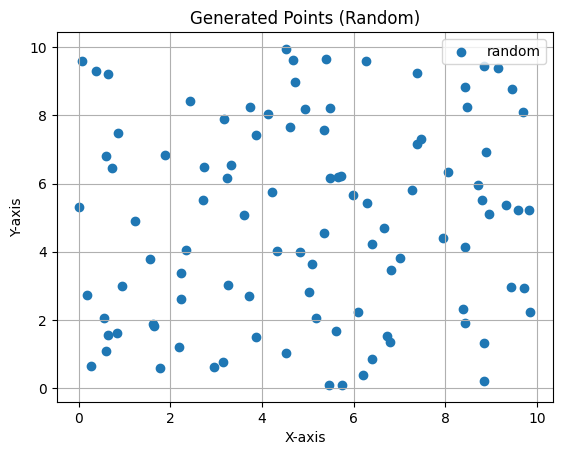

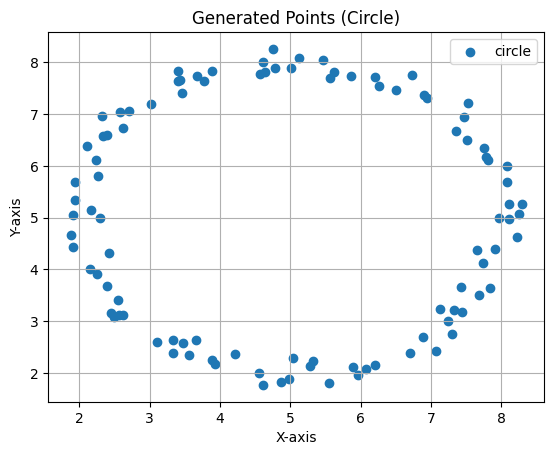

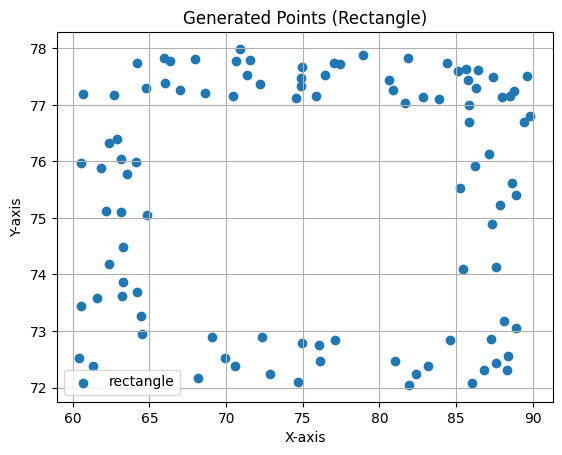

In [59]:
# Example usage:
random_points = generate_points_generic(100, 'random', 0, 10, 0, 10)
circle_points = generate_points_generic(100, 'circle', 5, 5, 3)
rectangle_points = generate_points_generic(100, 'rectangle', 75, 75, 25, 5)

plot_generated_points(random_points, 'random')
plot_generated_points(circle_points, 'circle')
plot_generated_points(rectangle_points, 'rectangle')

1. SUBSAMPLING

> Task1

In [60]:
def euclidean_distance(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

In [61]:
def task1(P, p1, k):
    S = [p1]
    centers = []
    for u in range(k):
        point_max = []
        distance_max = 0
        for p in P: #recherche de Pmax qui est le plus eloigne de S
            if p not in S:
                distance_min = math.inf
                for s in S:
                    distance_ps = euclidean_distance(p, s)
                    if distance_ps < distance_min:
                        distance_min = distance_ps
                if distance_min > distance_max:
                    distance_max = distance_min
                    point_max = p
        point_min = [] #recherche du S qui est le plus proche de ce Pmax
        distance_min = math.inf
        for s in S:
            distance_ps = euclidean_distance(point_max, s)
            if distance_ps < distance_min:
                distance_min = distance_ps
                point_min = s
        S.append(point_max)
        centers.append(point_min)
    return centers, S

k =  51


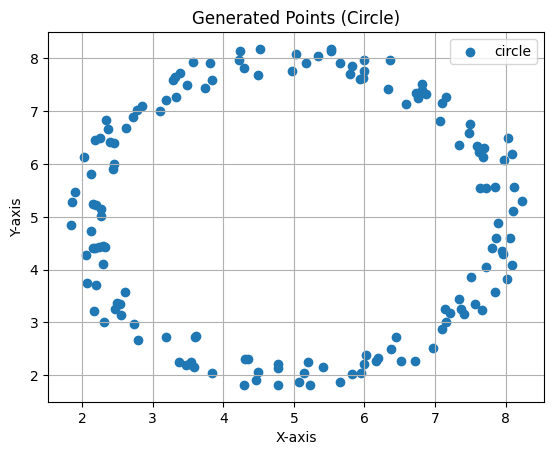

In [62]:
#Variable de test
nombre_point = 150
P = generate_points_generic(nombre_point, 'circle', 5, 5, 3)
p1 = P[random.randint(0, len(P)-1)]
k = random.randint(1, len(P))
print("k = ", k)
plot_generated_points(P, 'circle')

In [63]:
# Test de la fonction task1
temps_debut_task1 = time.time()
centers1, S1 = task1(P, p1, k)
temps_fin_task1 = time.time()

In [64]:
print("Temps d'exécution de task1 : ", temps_fin_task1 - temps_debut_task1, "pour k = ", k, "n = ", len(P))
print("centers1 : ",centers1)
print("S1 : ",S1)

Temps d'exécution de task1 :  0.496309757232666 pour k =  51 n =  150
centers1 :  [(5.3448877932947685, 8.054941204950087), (4.293140437845092, 1.8223831573715148), (5.3448877932947685, 8.054941204950087), (7.956577281188602, 4.354264863519385), (7.956577281188602, 4.354264863519385), (4.293140437845092, 1.8223831573715148), (5.3448877932947685, 8.054941204950087), (7.497708830446508, 6.759169159557622), (1.8987661171062629, 5.474845094830035), (6.7200886233656645, 2.270577790711806), (4.293140437845092, 1.8223831573715148), (5.3448877932947685, 8.054941204950087), (4.293140437845092, 1.8223831573715148), (3.323792485661143, 7.26494828378907), (5.3448877932947685, 8.054941204950087), (7.636692875325976, 5.542454971183535), (1.8987661171062629, 5.474845094830035), (4.224905389015129, 7.963568320575898), (5.4125694687682016, 2.1590353930288733), (6.328732723216924, 7.42766311523612), (7.636692875325976, 5.542454971183535), (2.3066101386852123, 3.013835252609995), (7.372964602715864, 3.25

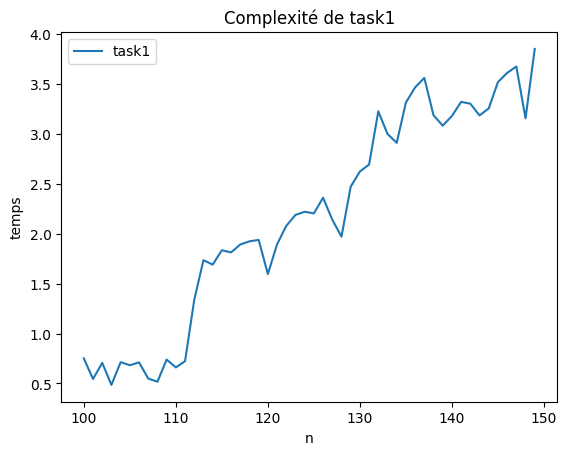

In [65]:
# Comparons la complexité à n^3
N_test1 = [i for i in range(100, 150)]
temps_test1 = []
temps_relatif_test1 = []

for j_test1 in N_test1:
    #print("on est à n = ", j_test1)
    P_test1 = generate_points_generic(j_test1, 'random', 0, 10, 0, 10)
    p1_test1 = P_test1[random.randint(0, len(P_test1)-1)]
    k_test1 = j_test1 - 1
    temps_debut_task1_test1 = time.time()
    centers_test1, S_test1 = task1(P_test1, p1_test1, k_test1)
    temps_fin_task1_test1 = time.time()
    temps_test1.append(temps_fin_task1_test1 - temps_debut_task1_test1)
    temps_relatif_test1.append((temps_fin_task1_test1 - temps_debut_task1_test1)/(j_test1**3))

plt.plot(N_test1, temps_test1, label='task1')
plt.xlabel('n')
plt.ylabel('temps')
plt.legend()
plt.title('Complexité de task1')
plt.show()

> Task2

In [66]:
def indice_max_colonne(liste, numero_colonne):
    colonne_max = max(range(len(liste)), key=lambda i: liste[i][numero_colonne])
    return colonne_max

In [67]:
def task2(P, p1, k):
    
    S = [p1]
    centers = []
    dictionnaire = []
    numero_colonne = 2
    
    for p in P:
        if p not in S:
            dictionnaire.append([p, p1, euclidean_distance(p, p1)])
    indice_max = indice_max_colonne(dictionnaire, numero_colonne)
    point_max = dictionnaire[indice_max][0]
    point_min = dictionnaire[indice_max][1]
    S.append(point_max)
    centers.append(point_min)
    dictionnaire.pop(indice_max)
            
    for u in range(k-1):
        for i in range(len(dictionnaire)):
            distance_ps = euclidean_distance(dictionnaire[i][0], S[-1])
            if distance_ps < dictionnaire[i][2]:
                dictionnaire[i][1] = S[-1]
                dictionnaire[i][2] = distance_ps
        indice_max = indice_max_colonne(dictionnaire, numero_colonne)
        point_max = dictionnaire[indice_max][0]
        point_min = dictionnaire[indice_max][1]
        S.append(point_max)
        centers.append(point_min)
        dictionnaire.pop(indice_max)
        
    return centers, S

In [68]:
# Test de la fonction task2
temps_debut_task2 = time.time()
centers2, S2 = task2(P, p1, k)
temps_fin_task2 = time.time()

In [69]:
print("Temps d'exécution de task2 : ", temps_fin_task2 - temps_debut_task2, "pour k = ", k, "n = ", len(P))
print("centers2 : ",centers2)
print("S2 : ",S2)


print("\nTemps d'exécution de task1 : ", temps_fin_task1 - temps_debut_task1, "pour k = ", k, "n = ", len(P))
print("centers1 : ",centers1)
print("S1 : ",S1)

print("\nlen(S1): ",len(S1), " len(centers1): ",len(centers1))
print("len(S2): ",len(S2), " len(centers2): ",len(centers2))

Temps d'exécution de task2 :  0.05938315391540527 pour k =  51 n =  150
centers2 :  [(5.3448877932947685, 8.054941204950087), (4.293140437845092, 1.8223831573715148), (5.3448877932947685, 8.054941204950087), (7.956577281188602, 4.354264863519385), (7.956577281188602, 4.354264863519385), (4.293140437845092, 1.8223831573715148), (5.3448877932947685, 8.054941204950087), (7.497708830446508, 6.759169159557622), (1.8987661171062629, 5.474845094830035), (6.7200886233656645, 2.270577790711806), (4.293140437845092, 1.8223831573715148), (5.3448877932947685, 8.054941204950087), (4.293140437845092, 1.8223831573715148), (3.323792485661143, 7.26494828378907), (5.3448877932947685, 8.054941204950087), (7.636692875325976, 5.542454971183535), (1.8987661171062629, 5.474845094830035), (4.224905389015129, 7.963568320575898), (5.4125694687682016, 2.1590353930288733), (6.328732723216924, 7.42766311523612), (7.636692875325976, 5.542454971183535), (2.3066101386852123, 3.013835252609995), (7.372964602715864, 3.

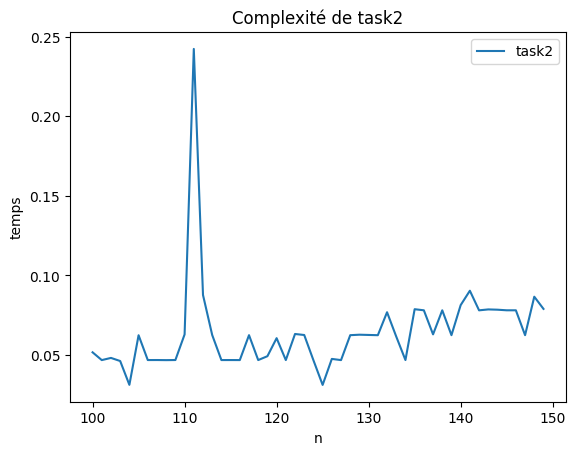

In [70]:
# Comparons la complexité à nk
N_test2 = [i for i in range(100, 150)]
temps_test2 = []
temps_relatif_test2 = []

for j_test2 in N_test2:
    P_test2 = generate_points_generic(j_test2, 'random', 0, 10, 0, 10)
    p1_test2 = P_test2[random.randint(0, len(P_test2)-1)]
    k_test2 = j_test2 - 1
    temps_debut_task2_test2 = time.time()
    centers_test2, S_test2 = task2(P_test2, p1_test2, k_test2)
    temps_fin_task2_test2 = time.time()
    temps_test2.append(temps_fin_task2_test2 - temps_debut_task2_test2)
    temps_relatif_test2.append((temps_fin_task2_test2 - temps_debut_task2_test2)/(j_test2*k_test2))

plt.plot(N_test2, temps_test2, label='task2')
plt.xlabel('n')
plt.ylabel('temps')
plt.legend()
plt.title('Complexité de task2')
plt.show()

> Task3

In [71]:
def finding(S):
    #l'idee est de retourner l'indice du tableau centres_rayons qui a le rayon le plus grand
    return indice_max_colonne(S, 0)

In [72]:
def updating(centres_rayons, regions, ligne_p):
    r = []
    distance_point = regions[ligne_p].pop(len(regions[ligne_p])-1)
    if len(regions[ligne_p]) > 0: #s'il reste des points dans la region de p, mettre le rayon max de la ligne consideree a jour
        centres_rayons[ligne_p][0] = regions[ligne_p][-1][0]
    else: #sinon mettre le rayon max de la ligne consideree a 0
        centres_rayons[ligne_p][0] = 0
    centres_rayons.append([0, distance_point[1]])
    tableau_temporaire = []
    index_delete = []
    for i in range(len(regions)):
        distance_reference = euclidean_distance(distance_point[1], centres_rayons[ligne_p][1])
        if distance_reference < 2*centres_rayons[i][0]:
            table = []
            for j in range(len(regions[i])):
                if [i, j] not in index_delete:
                    distance = euclidean_distance(distance_point[1], regions[i][j][1])
                    if distance < regions[i][j][0]:
                        index_delete.append([i, j])
                        temporaire = regions[i][j]
                        tableau_temporaire.append((distance, temporaire[1]))
                    else:
                        table.append(regions[i][j])
            r.append(table)
        else:
            r.append(regions[i])
        if len(r[i]) > 0:
            centres_rayons[i][0] = r[i][-1][0]
        else:
            centres_rayons[i][0] = 0
    regions = r
    tableau_temporaire = sorted(tableau_temporaire, key=lambda x: x[0])
    if len(tableau_temporaire) > 0: #mise a jour du rayon du centre p
        centres_rayons[-1][0] = tableau_temporaire[-1][0]
    regions.append(tableau_temporaire)
    return centres_rayons, regions

In [73]:
def task3(P, p1, k):
    #Declarons les variables
    S = [p1]
    centers = []
    centres_rayons = [[0, p1]]
    regions = []
    
    #Initialisons les variables centres_rayons(tableaux des couples rayon max et centre) et regions(tableaux des couples distance et point dont la ligne i compte les point du centre i)
    distance_max = 0
    tableau = []
    for p in P:
        if p != p1:
            distance = euclidean_distance(p, p1)
            tableau.append((distance, p))
            if distance > distance_max:
                distance_max = distance
    centres_rayons[0][0] = distance_max
    tableau = sorted(tableau, key=lambda x: x[0])
    regions.append(tableau)

    #Boucle pour trouver les k-1 centres restants
    for u in range(k):
        ligne_p = finding(centres_rayons)
        S.append(regions[ligne_p][-1][1])
        centers.append(centres_rayons[ligne_p][1])
        centres_rayons, regions = updating(centres_rayons, regions, ligne_p)
    
    return centers, S

In [74]:
# Test de la fonction task3
temps_debut_task3 = time.time()
centers3, S3 = task3(P, p1, k)
temps_fin_task3 = time.time()

In [75]:
print("Temps d'exécution de task3 : ", temps_fin_task3 - temps_debut_task3, "pour k =", k, "n =", len(P))
print("centers3 :", centers3)
print("S3 :", S3)

Temps d'exécution de task3 :  0.05865836143493652 pour k = 51 n = 150
centers3 : [(5.3448877932947685, 8.054941204950087), (4.293140437845092, 1.8223831573715148), (5.3448877932947685, 8.054941204950087), (7.956577281188602, 4.354264863519385), (7.956577281188602, 4.354264863519385), (4.293140437845092, 1.8223831573715148), (5.3448877932947685, 8.054941204950087), (7.497708830446508, 6.759169159557622), (1.8987661171062629, 5.474845094830035), (6.7200886233656645, 2.270577790711806), (4.293140437845092, 1.8223831573715148), (5.3448877932947685, 8.054941204950087), (4.293140437845092, 1.8223831573715148), (3.323792485661143, 7.26494828378907), (5.3448877932947685, 8.054941204950087), (7.636692875325976, 5.542454971183535), (1.8987661171062629, 5.474845094830035), (4.224905389015129, 7.963568320575898), (5.4125694687682016, 2.1590353930288733), (6.328732723216924, 7.42766311523612), (7.636692875325976, 5.542454971183535), (2.3066101386852123, 3.013835252609995), (7.372964602715864, 3.251

In [76]:
print("Temps d'exécution de task3 : ", temps_fin_task3 - temps_debut_task3, "pour k = ", k, "n = ", len(P))
print("centers3 : ",centers3)
print("S3 : ",S3)


print("\nTemps d'exécution de task2 : ", temps_fin_task2 - temps_debut_task2, "pour k = ", k, "n = ", len(P))
print("centers2 : ",centers2)
print("S2 : ",S2)


print("\nTemps d'exécution de task1 : ", temps_fin_task1 - temps_debut_task1, "pour k = ", k, "n = ", len(P))
print("centers1 : ",centers1)
print("S1 : ",S1)

print("\nlen(S1): ",len(S1), " len(centers1): ",len(centers1))
print("len(S2): ",len(S2), " len(centers2): ",len(centers2))
print("len(S3): ",len(S3), " len(centers3): ",len(centers3))

Temps d'exécution de task3 :  0.05865836143493652 pour k =  51 n =  150
centers3 :  [(5.3448877932947685, 8.054941204950087), (4.293140437845092, 1.8223831573715148), (5.3448877932947685, 8.054941204950087), (7.956577281188602, 4.354264863519385), (7.956577281188602, 4.354264863519385), (4.293140437845092, 1.8223831573715148), (5.3448877932947685, 8.054941204950087), (7.497708830446508, 6.759169159557622), (1.8987661171062629, 5.474845094830035), (6.7200886233656645, 2.270577790711806), (4.293140437845092, 1.8223831573715148), (5.3448877932947685, 8.054941204950087), (4.293140437845092, 1.8223831573715148), (3.323792485661143, 7.26494828378907), (5.3448877932947685, 8.054941204950087), (7.636692875325976, 5.542454971183535), (1.8987661171062629, 5.474845094830035), (4.224905389015129, 7.963568320575898), (5.4125694687682016, 2.1590353930288733), (6.328732723216924, 7.42766311523612), (7.636692875325976, 5.542454971183535), (2.3066101386852123, 3.013835252609995), (7.372964602715864, 3.

> Task4

In [77]:
def finding4(s):
    #l'idee est de retourner l'indice du tableau centres_rayons qui a le rayon le plus grand
    return s[0]

In [78]:
def updating4(max, centres_rayons, regions):
    ligne_p = max[0]
    r = []
    imax = 0
    dmax = 0
    
    distance_point = regions[ligne_p].pop(len(regions[ligne_p])-1) #suppression du point le plus eloigne de S l'espace tout entier
    if len(regions[ligne_p]) > 0: #s'il reste des points dans la region de p, mettre le rayon max de la ligne consideree a jour
        centres_rayons[ligne_p][0] = regions[ligne_p][-1][0]
    else: #sinon mettre le rayon max de la ligne consideree a 0
        centres_rayons[ligne_p][0] = 0
    centres_rayons.append([0, distance_point[1]]) #ajout du centre p dans le tableau centres_rayons table des centres
    
    tableau_temporaire = []
    index_delete = []
    
    for i in range(len(regions)):
        distance_reference = euclidean_distance(distance_point[1], centres_rayons[i][1])
        if distance_reference <= 2*centres_rayons[i][0]: #si p peut voler des points au centre en ligne i
            table = []
            for j in range(len(regions[i])):
                if [i, j] not in index_delete:
                    distance = euclidean_distance(distance_point[1], regions[i][j][1])
                    if distance < regions[i][j][0]: #point a suppimer
                        index_delete.append([i, j]) #suis sense remettre a jour le rayon max du centre !!!!!!!
                        temporaire = regions[i][j]
                        tableau_temporaire.append((distance, temporaire[1]))
                        if len(regions[i]) == 1:
                            centres_rayons[i][0] = 0 #car (i,j) sera supprimer et il ne restera plus rien dans centres_rayons[i]
                        else:
                            centres_rayons[i][0] = regions[i][-1][0] #mise a jour du rayon max du centre
                    else:
                        table.append(regions[i][j]) #construction de la nouvelle region terminee pour la ligne i
            r.append(table)
        else: #si p ne peut pas voler des points au centre en ligne i
            r.append(regions[i])
        if len(r[i]) > 0:
            centres_rayons[i][0] = r[i][-1][0]
        else:
            centres_rayons[i][0] = 0
        if centres_rayons[i][0] > dmax: #mise a jour du centre avec le rayon le plus grand
            dmax = centres_rayons[i][0]
            imax = i
    regions = r
    tableau_temporaire = sorted(tableau_temporaire, key=lambda x: x[0]) #tri des points qui ont etes voles par p
    regions.append(tableau_temporaire) #ajout des points voles par p dans la region de p
    if len(tableau_temporaire) > 0: #mise a jour du rayon du centre p
        centres_rayons[-1][0] = tableau_temporaire[-1][0]
        if centres_rayons[-1][0] > dmax:
            dmax = centres_rayons[-1][0]
            imax = len(centres_rayons) - 1
            
    max = [imax, centres_rayons[imax][0], centres_rayons[imax][1]]
    
    return max, centres_rayons, regions

In [79]:
def task4(P, p1, k):
    #Declarons les variables
    S = [p1]
    centers = []
    centres_rayons = [[0, p1]]
    regions = []
    
    #Initialisons les variables centres_rayons(tableaux des couples rayon max et centre) et regions(tableaux des couples distance et point dont la ligne i compte les point du centre i)
    distance_max = 0
    tableau = []
    for p in P:
        if p != p1:
            distance = euclidean_distance(p, p1)
            tableau.append((distance, p))
            if distance > distance_max:
                distance_max = distance
    centres_rayons[0][0] = distance_max
    tableau = sorted(tableau, key=lambda x: x[0])
    regions.append(tableau)

    max = [0, centres_rayons[0][0], centres_rayons[0][1]]

    #Boucle pour trouver les k-1 centres restants
    for u in range(k):
        ligne_p = finding4(max)
        S.append(regions[ligne_p][-1][1])
        centers.append(centres_rayons[ligne_p][1])
        max, centres_rayons, regions = updating4(max, centres_rayons, regions)
    
    return centers, S

In [80]:
# Test de la fonction task4
temps_debut_task4 = time.time()
centers4, S4 = task4(P, p1, k)
temps_fin_task4 = time.time()

In [81]:
print("Temps d'exécution de task4 : ", temps_fin_task4 - temps_debut_task4, "pour k =", k, "n =", len(P))
print("centers4 :", centers4)
print("S4 :", S4)

Temps d'exécution de task4 :  0.0157773494720459 pour k = 51 n = 150
centers4 : [(5.3448877932947685, 8.054941204950087), (4.293140437845092, 1.8223831573715148), (5.3448877932947685, 8.054941204950087), (7.956577281188602, 4.354264863519385), (7.956577281188602, 4.354264863519385), (4.293140437845092, 1.8223831573715148), (5.3448877932947685, 8.054941204950087), (7.497708830446508, 6.759169159557622), (1.8987661171062629, 5.474845094830035), (6.7200886233656645, 2.270577790711806), (4.293140437845092, 1.8223831573715148), (5.3448877932947685, 8.054941204950087), (4.293140437845092, 1.8223831573715148), (3.323792485661143, 7.26494828378907), (5.3448877932947685, 8.054941204950087), (7.636692875325976, 5.542454971183535), (1.8987661171062629, 5.474845094830035), (4.224905389015129, 7.963568320575898), (5.4125694687682016, 2.1590353930288733), (6.328732723216924, 7.42766311523612), (7.636692875325976, 5.542454971183535), (2.3066101386852123, 3.013835252609995), (7.372964602715864, 3.2512

In [82]:
print("Temps d'exécution de task4 : ", temps_fin_task4 - temps_debut_task4, "pour k =", k, "n =", len(P))
print("centers4 :", centers4)
print("S4 :", S4)


print("\nTemps d'exécution de task3 : ", temps_fin_task3 - temps_debut_task3, "pour k = ", k, "n = ", len(P))
print("centers3 : ",centers3)
print("S3 : ",S3)


print("\nTemps d'exécution de task2 : ", temps_fin_task2 - temps_debut_task2, "pour k = ", k, "n = ", len(P))
print("centers2 : ",centers2)
print("S2 : ",S2)


print("\nTemps d'exécution de task1 : ", temps_fin_task1 - temps_debut_task1, "pour k = ", k, "n = ", len(P))
print("centers1 : ",centers1)
print("S1 : ",S1)

print("\nlen(S1): ",len(S1), " len(centers1): ",len(centers1))
print("len(S2): ",len(S2), " len(centers2): ",len(centers2))
print("len(S3): ",len(S3), " len(centers3): ",len(centers3))
print("len(S4): ",len(S4), " len(centers4): ",len(centers4))

Temps d'exécution de task4 :  0.0157773494720459 pour k = 51 n = 150
centers4 : [(5.3448877932947685, 8.054941204950087), (4.293140437845092, 1.8223831573715148), (5.3448877932947685, 8.054941204950087), (7.956577281188602, 4.354264863519385), (7.956577281188602, 4.354264863519385), (4.293140437845092, 1.8223831573715148), (5.3448877932947685, 8.054941204950087), (7.497708830446508, 6.759169159557622), (1.8987661171062629, 5.474845094830035), (6.7200886233656645, 2.270577790711806), (4.293140437845092, 1.8223831573715148), (5.3448877932947685, 8.054941204950087), (4.293140437845092, 1.8223831573715148), (3.323792485661143, 7.26494828378907), (5.3448877932947685, 8.054941204950087), (7.636692875325976, 5.542454971183535), (1.8987661171062629, 5.474845094830035), (4.224905389015129, 7.963568320575898), (5.4125694687682016, 2.1590353930288733), (6.328732723216924, 7.42766311523612), (7.636692875325976, 5.542454971183535), (2.3066101386852123, 3.013835252609995), (7.372964602715864, 3.2512

3. Experiments

> Les expériences ont été réalisées au fur et à mesure que nous écrivions les codes des différentes tâches.

4. Going further

In [83]:
def generate_points_high_dimension(n, d, *args):
    """
    Generates n points in a high-dimensional space.
    
    Args:
        n (int): Number of points to generate.
        d (int): Dimension of the space.
        *args: Ranges for each dimension, specified as tuples (min, max).
        
    Returns:
        list: List of generated points.
    """
    points = []

    if len(args) != d:
        raise ValueError("Number of dimension ranges should match the specified dimension.")

    for _ in range(n):
        point = [random.uniform(r[0], r[1]) for r in args]
        points.append(tuple(point))

    return points

In [84]:
# Exemple d'utilisation avec d=3 pour générer des points dans un espace tridimensionnel
bord_pave_une_direction = [-10, 10]
dimension = 5
nombre_point_high_dimension = 100
points = generate_points_high_dimension(nombre_point_high_dimension, dimension, *([bord_pave_une_direction]*dimension))
print(points)

[(-8.642926561089281, -9.645391945169576, 6.383092998970948, 2.710090344614999, 7.858476793165686), (-8.423548679258527, 4.9388140133326335, -2.945439717678524, -4.102444180858178, 2.800371826203625), (-8.68074500949458, 9.578011030656086, 7.179118457729345, -0.7549218362256482, 2.2850960213635556), (3.7179958139316263, 7.465265683521444, -3.0188436886438863, 3.311475496359087, -6.275677131504471), (3.812741551316684, -7.289828835867487, -9.489187807594927, -0.9586081097946639, 1.089910860278767), (1.2985042110985052, 1.6117168759510108, -5.625181187031072, 6.329661454472774, 3.296321088041134), (3.9531369422949414, -7.724810594808142, 7.778181742737097, -8.582455600428533, -1.0773540313627663), (-2.352638626495855, -1.3378842195725298, 1.925237776906279, -0.43855748439345277, -4.320127566325933), (3.6167979835946706, 9.639891118196886, 3.134232785053829, 0.012726692134476636, 9.891201072725956), (-2.5852182726464967, -4.428578023960745, 6.389140231126085, 8.77982312017425, 5.958993805

> Premier point

La généralisation se fait intuitivement car la fonction que nous avons définie pour calculer la distance entre deux points est "np.linalg.norm". La différence que nous notons réside au niveau de la complexité requise pour le calcul de cette distance : elle passe de O(1) à O(d), où d est la dimension.

En considérant l'algorithme réalisé à la tâche 4, regardons comment varie le temps d'exécution en fonction de la dimension d, que nous ferons varier de 1 à 20. Nous effectuons des mesures pour différentes valeurs de d, générons des ensembles de points dans différentes dimensions, mesurons le temps d'exécution de l'algorithme pour chaque ensemble de points, puis traçons un graphique illustrant comment le temps d'exécution change en fonction de d.

In [85]:
table_dimension = [i for i in range(1, 201)]
nombre_point_high_dimension_test = 100
k_test = nombre_point_high_dimension_test - 1
print("table des dimensions", table_dimension)
print("nombre de points", nombre_point_high_dimension_test)
print("k", k_test)

table des dimensions [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]
nombre de points 100
k 99


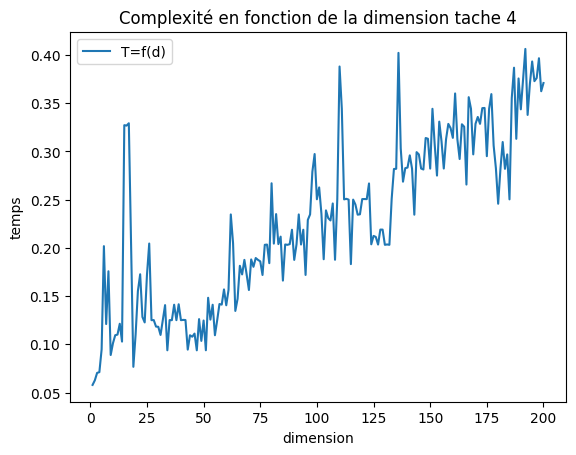

In [86]:
#Comparaison des temps d'exécution de diffentes dimensions
temps_test_high_dimension = []
for d in table_dimension:
    temps_debut_test_high_dimension = time.time()
    points = generate_points_high_dimension(nombre_point_high_dimension_test, d, *([bord_pave_une_direction]*d))
    centers_test_high_dimension, S_test_high_dimension = task4(points, points[random.randint(0, len(points)-1)], k_test)
    temps_fin_test_high_dimension = time.time()
    temps_test_high_dimension.append(temps_fin_test_high_dimension - temps_debut_test_high_dimension)
    
plt.plot(table_dimension, temps_test_high_dimension, label='T=f(d)')
plt.xlabel('dimension')
plt.ylabel('temps')
plt.legend()
plt.title('Complexité en fonction de la dimension tache 4')
plt.show()

Remarque : Ce temps évolue de manière linéaire par rapport à la dimension.

NB : Regardons particulièrement le cas où les points sont situés sur une même droite.

In [87]:
#Genreation des points situes sur une meme droite en dimension 5
points = generate_points_high_dimension(nombre_point_high_dimension, dimension, bord_pave_une_direction, *([[0, 0]]*(dimension-1)))
print(points)

[(1.7745290151613808, 0.0, 0.0, 0.0, 0.0), (-6.071598769801136, 0.0, 0.0, 0.0, 0.0), (2.45461242574285, 0.0, 0.0, 0.0, 0.0), (7.264621979377591, 0.0, 0.0, 0.0, 0.0), (-2.746039277034944, 0.0, 0.0, 0.0, 0.0), (-8.886699942950438, 0.0, 0.0, 0.0, 0.0), (1.9330918919965523, 0.0, 0.0, 0.0, 0.0), (-2.1008935778846594, 0.0, 0.0, 0.0, 0.0), (5.150027736391923, 0.0, 0.0, 0.0, 0.0), (6.210244718272428, 0.0, 0.0, 0.0, 0.0), (5.917154655588794, 0.0, 0.0, 0.0, 0.0), (-3.3520198990722783, 0.0, 0.0, 0.0, 0.0), (-1.9859556484904566, 0.0, 0.0, 0.0, 0.0), (-7.884521415330006, 0.0, 0.0, 0.0, 0.0), (-1.1995703943254536, 0.0, 0.0, 0.0, 0.0), (-2.7135826664708596, 0.0, 0.0, 0.0, 0.0), (-6.643122921665212, 0.0, 0.0, 0.0, 0.0), (9.633799443757091, 0.0, 0.0, 0.0, 0.0), (2.177756422729903, 0.0, 0.0, 0.0, 0.0), (-6.726765025319192, 0.0, 0.0, 0.0, 0.0), (-9.89648616242853, 0.0, 0.0, 0.0, 0.0), (3.9979624615185188, 0.0, 0.0, 0.0, 0.0), (9.23953930128479, 0.0, 0.0, 0.0, 0.0), (9.789466748660015, 0.0, 0.0, 0.0, 0.0)

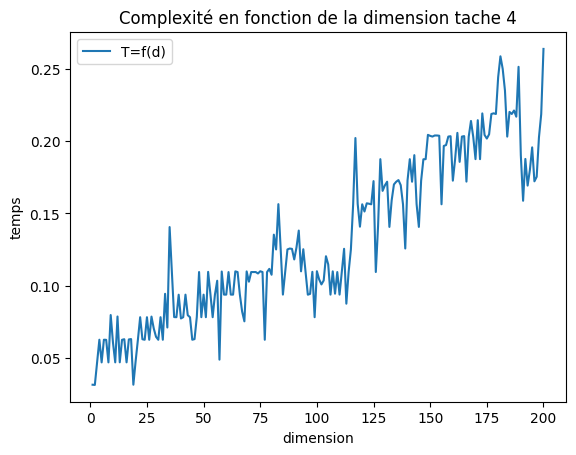

In [88]:
#Complexite pour cette situation
temps_test_high_dimension = []
for d in table_dimension:
    temps_debut_test_high_dimension = time.time()
    points = generate_points_high_dimension(nombre_point_high_dimension, d, bord_pave_une_direction, *([[0, 0]]*(d-1)))
    centers_test_high_dimension, S_test_high_dimension = task4(points, points[random.randint(0, len(points)-1)], k_test)
    temps_fin_test_high_dimension = time.time()
    temps_test_high_dimension.append(temps_fin_test_high_dimension - temps_debut_test_high_dimension)
    
plt.plot(table_dimension, temps_test_high_dimension, label='T=f(d)')
plt.xlabel('dimension')
plt.ylabel('temps')
plt.legend()
plt.title('Complexité en fonction de la dimension tache 4')
plt.show()

Cela ne change rien, car on observe toujours une corrélation linéaire entre le temps d'exécution et la dimension de l'espace.

### 2 Neighborhood

>Task5

In [89]:
def task5(P):
    G = nx.Graph()
    G.add_nodes_from(P)
    S = P
    Bool= 1
    edges = []
    for p in S:
        for s in S: 
            a = euclidean_distance(p,s)
            if(a == 0):
                    continue
            for k in S:
                if max(euclidean_distance(p,k), euclidean_distance(s,k))<a:
                    Bool=0
            if Bool==1:
                edges.append((p,s))
            Bool= 1
        G.add_edges_from(edges)
        edges = []
    return G

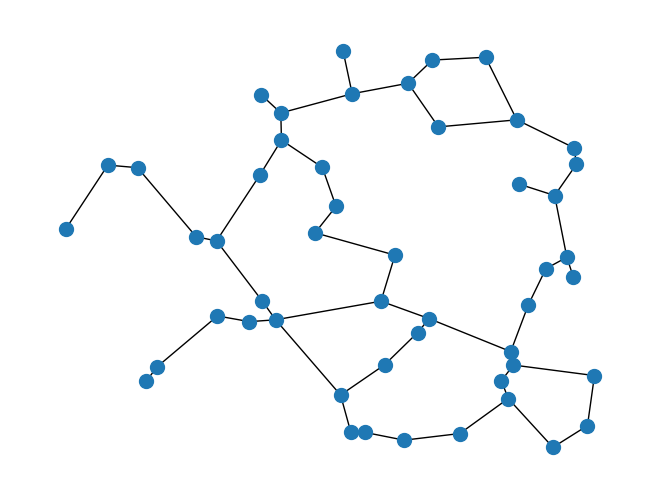

In [90]:
#Graphe du plan
P = generate_points_generic(50, 'random', 0, 10, 0, 10)
G = task5(P)
pos = {node: (x, y) for node, (x, y) in zip(G.nodes, P)}
# Draw the graph
nx.draw(G, pos, font_weight='bold', node_size=100)


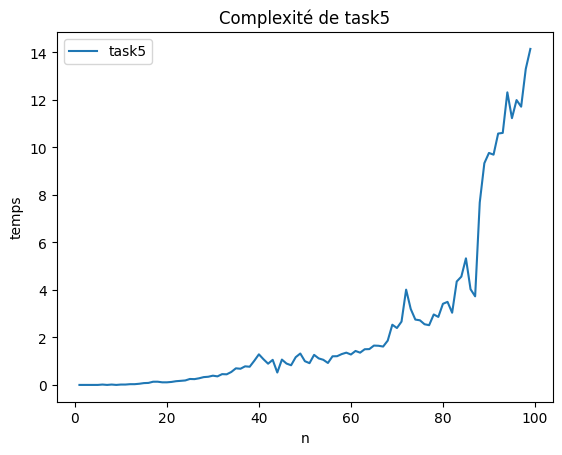

In [91]:
#compute the complexity
N_test5 = [i for i in range(1, 100)]
temps_test5 = []
temps_relatif_test5 = []

for j_test5 in N_test5:
    P_test5 = generate_points_generic(j_test5, 'random', 0, 10, 0, 10)
    p1_test5 = P_test5[random.randint(0, len(P_test5)-1)]
    temps_debut_task5_test5 = time.time()
    S_test5 = task5(P_test5)
    temps_fin_task5_test5 = time.time()
    temps_test5.append(temps_fin_task5_test5 - temps_debut_task5_test5)
    temps_relatif_test5.append((temps_fin_task5_test5 - temps_debut_task5_test5)/(j_test5**3))

plt.plot(N_test5, temps_test5, label='task5')
plt.xlabel('n')
plt.ylabel('temps')
plt.legend()
plt.title('Complexité de task5')
plt.show()

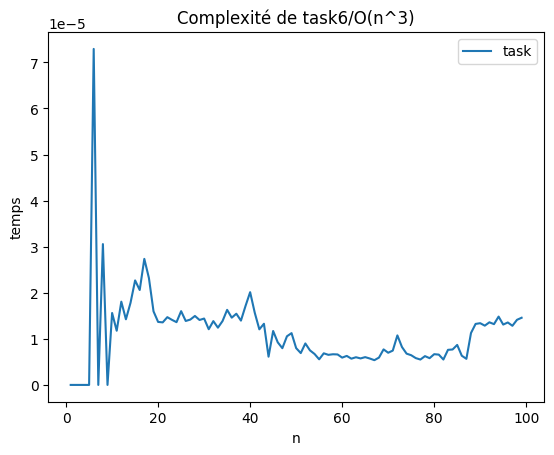

In [108]:
#plot a graph to show that complexity is O(n^3)
plt.plot(N_test5, temps_relatif_test5, label='task')
plt.xlabel('n')
plt.ylabel('temps')
plt.legend()
plt.title('Complexité de task6/O(n^3)')
plt.show()

> 2 More efficient

In [92]:
def select_closer(p, P):
    r = P[0]
    a = euclidean_distance(p,r)
    for j in range(1,len(P)):
        b = euclidean_distance(p,P[j])
        if(b == 0):
                continue
        if a>b or a==0:
            r = P[j]
            a = b
    return r

In [93]:
def r_no_hidden_by_q(p,q,S):
    T = []
    for r in S:
        a= euclidean_distance(p,r)
        if euclidean_distance(q,r)>a and a!=0:
            T.append(r)
            
    return T

In [94]:
def task6(P):
    G = nx.Graph()
    G.add_nodes_from(P)
    edges = []
    Rest_P = []
    Bool= 1
    for p in P:
        S = P
        while len(S)!=0:
            q = select_closer(p,S)
            Rest_P.append(q)
            S = r_no_hidden_by_q(p,q,S)
        Rest= list(set(P)-set(Rest_P))
        for r in Rest_P:
            a = euclidean_distance(p,r)
            if(a == 0):
                continue
            for k in Rest:
                if max(euclidean_distance(p,k), euclidean_distance(r,k))<a:
                    Bool=0
            if Bool==1:
                edges.append((p,r))
            Bool= 1
        G.add_edges_from(edges)
        edges = []
        Rest_P = []
    return G

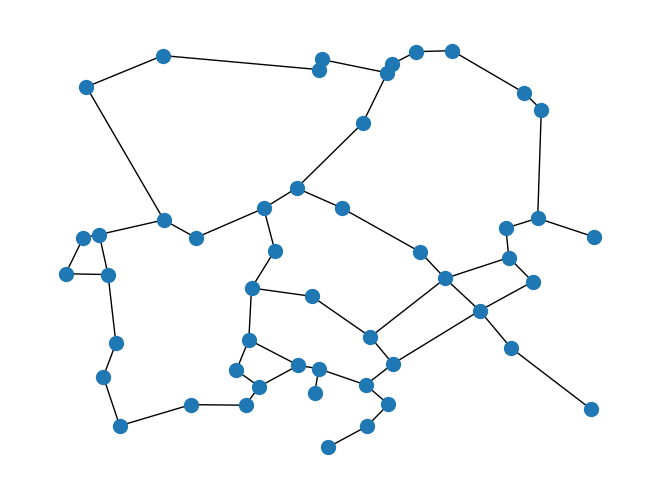

In [95]:
P = generate_points_generic(50, 'random', 0, 10, 0, 10)
G = task6(P)
pos = {node: (x, y) for node, (x, y) in zip(G.nodes, P)}
# Draw the graph
nx.draw(G, pos, font_weight='bold', node_size=100)


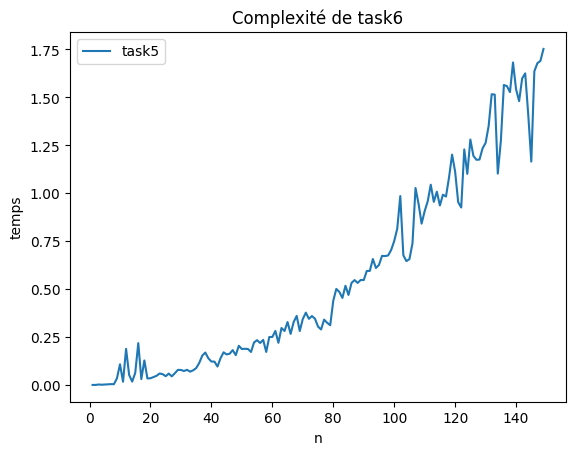

In [96]:
#compute the complexity
N_test6 = [i for i in range(1, 150)]
temps_test6 = []
temps_relatif_test6 = []

for j_test6 in N_test6:
    P_test6 = generate_points_generic(j_test6, 'random', 0, 10, 0, 10)
    p1_test6 = P_test6[random.randint(0, len(P_test6)-1)]
    temps_debut_task6_test6 = time.time()
    S_test6 = task6(P_test6)
    temps_fin_task6_test6 = time.time()
    temps_test6.append(temps_fin_task6_test6 - temps_debut_task6_test6)
    temps_relatif_test6.append((temps_fin_task6_test6 - temps_debut_task6_test6)/(j_test6**2))

plt.plot(N_test6, temps_test6, label='task6')
plt.xlabel('n')
plt.ylabel('temps')
plt.legend()
plt.title('Complexité de task6')
plt.show()

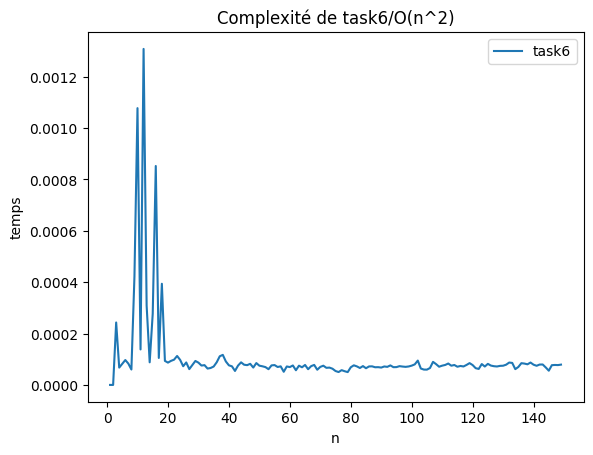

In [109]:
plt.plot(N_test6, temps_relatif_test6, label='task6')
plt.xlabel('n')
plt.ylabel('temps')
plt.legend()
plt.title('Complexité de task6/O(n^2)')
plt.show()

>Task7

In [104]:
def incremental(p,P,R:nx.Graph):
    S = P.copy()
    T=[]
    Edges = []
    Rest_T=[]
    Bool=1
    G = nx.Graph()
    G = R
    while len(S)!=0 :
        q = select_closer(p,S)
        T.append(q)
        S = r_no_hidden_by_q(p,q,S)
    if len(T)==1 and T[0]==p:
        T =[]
    Rest= list(set(P)-set(T))
    for r in T:
        a = euclidean_distance(p,r)
        if(a == 0):
            continue
        for k in Rest:
            if max(euclidean_distance(p,k), euclidean_distance(r,k))<a:
                Bool=0
                break
        if Bool==1:
            Rest_T.append(r)
        Bool= 1
    for u in Rest_T:
        for v in Rest_T:
            if (G.has_edge(u,v)):
                a = euclidean_distance(u,v)
                if(euclidean_distance(p,u)!=a or euclidean_distance(p,v)!=a):
                    G.remove_edge(u,v)   
            Edges.append((p,v))
        Edges.append((u,p))
    return G, Edges

In [105]:
def task7(P, Z:nx.Graph):
    edge = []
    for p in P:
        Z.add_nodes_from([p])
        Z, ed= incremental(p,P,Z)
        edge.extend(ed)
    Z.add_edges_from(edge)
    return Z

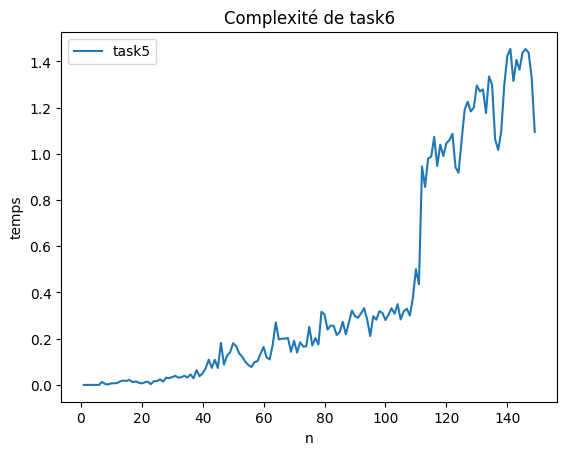

In [106]:
#compute the complexity
N_test7 = [i for i in range(1, 150)]
temps_test7 = []
temps_relatif_test7 = []
S_test7 = nx.Graph()
for j_test7 in N_test7:
    P_test7 = generate_points_generic(j_test7, 'random', 0, 10, 0, 10)
    p1_test7 = P_test7[random.randint(0, len(P_test7)-1)]
    temps_debut_task7_test7 = time.time()
    S_test7 = task7(P_test7,S_test7)
    temps_fin_task7_test7 = time.time()
    temps_test7.append(temps_fin_task7_test7 - temps_debut_task7_test7)
    temps_relatif_test7.append((temps_fin_task7_test7 - temps_debut_task7_test7)/(j_test7**2))

plt.plot(N_test7, temps_test7, label='task5')
plt.xlabel('n')
plt.ylabel('temps')
plt.legend()
plt.title('Complexité de task6')
plt.show()

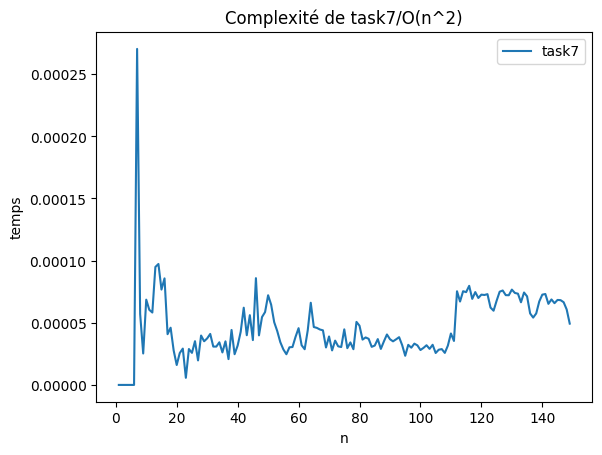

In [112]:
plt.plot(N_test7, temps_relatif_test7, label='task7')
plt.xlabel('n')
plt.ylabel('temps')
plt.legend()
plt.title('Complexité de task7/O(n^2)')
plt.show()

>animation

MovieWriter imagemagick unavailable; using Pillow instead.


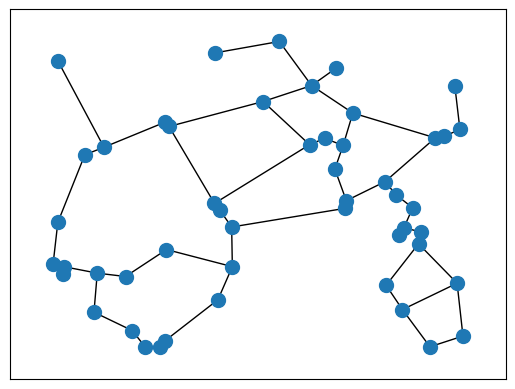

In [113]:
import matplotlib.animation as animation

P = generate_points_generic(50, 'random', 0, 10, 0, 10)
Z = nx.Graph()
edges= []
for p in P:
    Z.add_nodes_from([p])
    Z, B= incremental(p,P,Z)
    edges.extend(B)


fig, ax = plt.subplots()
pos = dict()
pos = {node: (x, y) for node, (x, y) in zip(Z.nodes, P)}

def animate(i):
    if i < len(edges):
        Z.add_edge(*edges[i])
        ax.clear()
        nx.draw_networkx(Z, pos, ax=ax,node_size=100, with_labels=False)


ani = animation.FuncAnimation(fig, animate, frames=len(edges), interval=100, repeat=True)

# Save as GIF
ani.save("networkanimation.gif", writer='imagemagick')


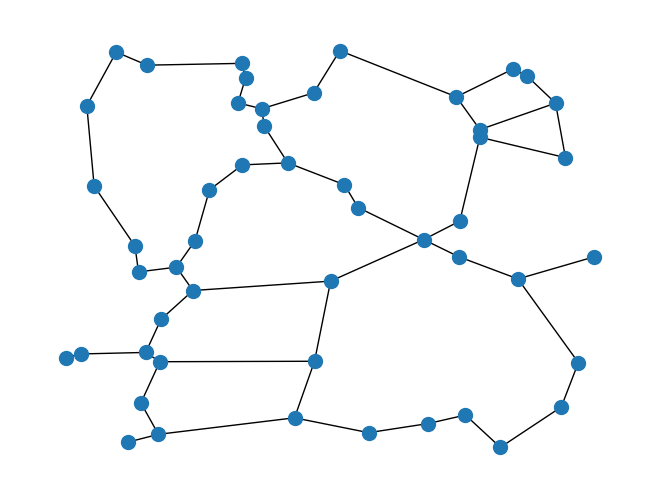

In [102]:
T = nx.Graph()
T = task6(P)
pos = {node: (x, y) for node, (x, y) in zip(T.nodes, P)}
# Draw the graph
nx.draw(Z, pos, font_weight='bold', node_size=100)